## Preparing the enviroment

### Importing Dependecies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import matplotlib.dates as md

from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, VolatilityShiftAD

### Loading Data

In [7]:
df_1 = pd.read_csv('data/transactions_1.csv')
df_1['time'] =  pd.to_datetime(df_1['time'], format = "%Hh %M")#.dt.time
df_1_pivoted = df_1.pivot_table(columns='status', values= 'f0_', index= 'time', fill_value=0, aggfunc= 'sum', margins = True, margins_name= 'totals')

In [10]:
df_1_pivoted['percentage_failed'] =   (df_1_pivoted['failed']) / df_1_pivoted['totals']
df_1_pivoted['percentage_denied'] =  (df_1_pivoted['denied']) / df_1_pivoted['totals']
df_1_pivoted['percentage_reversed'] = (df_1_pivoted['reversed']) / df_1_pivoted['totals']
df_1_pivoted['sucess_rate'] = df_1_pivoted['approved'] / df_1_pivoted['totals']

## Training Predictive Models

### Training percentage_failed model


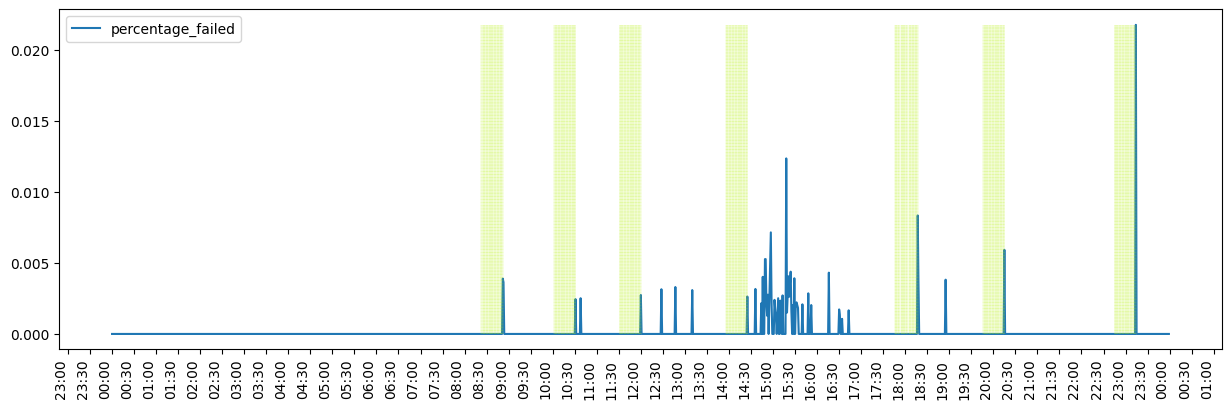

In [41]:
'''Choosing the variable'''
evaluated_variable  = 'percentage_failed' 

'''To apply the model we must create a dataframe with the timestamp as an index and our variable as a single column'''
train_failed = pd.DataFrame(index = list(df_1_pivoted.index.drop('totals')),
                             columns= [evaluated_variable],
                            data=list(df_1_pivoted[evaluated_variable].values[0:-1]) )
train_failed = validate_series(train_failed)

'''Creating model'''
model_percentage_failed = VolatilityShiftAD(c=15.0, side='positive', window=(30,30))
'''Training model'''
anomalies = model_percentage_failed.fit_detect(train_failed)
''' Plotting'''
anomalies_plot_x = anomalies.loc[anomalies[evaluated_variable] == True].index
figure= train_failed.plot(figsize=(15,5))
#Setting hourly
figure.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
figure.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.setp(figure.xaxis.get_majorticklabels(), rotation = 90)
figure.vlines(x=anomalies_plot_x, ymax=train_failed[evaluated_variable].max(),ymin=0, linestyles= 'dashed', colors  = '#b5f209' ,linewidth=0.2)

### Training percentage_denied model

" As you can see the data starts with alot of volatily, i'm gonna exclude the first portion of the day, to avoid fiting on the anomalies"

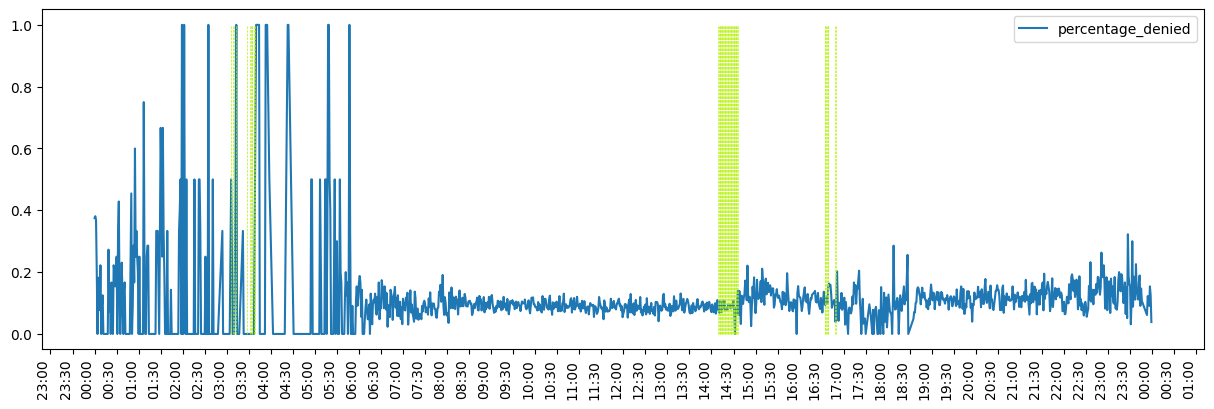

In [70]:
evaluated_variable  = 'percentage_denied' 
'''To apply the model we must create a dataframe with the timestamp as an index and our variable as a single column'''
train_failed = pd.DataFrame(index = list(df_1_pivoted.index.drop('totals')),
                             columns= [evaluated_variable],
                            data=list(df_1_pivoted[evaluated_variable].values[0:-1]) )
train_failed = validate_series(train_failed)
'''Creating model'''
model_percentage_denied = VolatilityShiftAD(c=2.0, side='positive', window=30) 
''' Since the training data is very volatile, 
i have to increase the sensibility of the model to capture smaller variances 
'''

'''Training model'''
anomalies = model_percentage_denied.fit_detect(train_failed)


'''Plotting'''
anomalies_plot_x = anomalies.loc[anomalies[evaluated_variable] == True].index
figure = train_failed.plot(figsize=(15,5))
figure.vlines(x=anomalies_plot_x, ymax=train_failed[evaluated_variable].max(),ymin=0, linestyles= 'dashed', colors  = '#b5f209' ,linewidth=0.5)
#Setting hourly
figure.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
figure.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.setp(figure.xaxis.get_majorticklabels(), rotation = 90)
''' As you can see the data starts with alot of volatily, i'm gonna exclude the first portion of the day, to avoid fiting on the anomalies'''

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

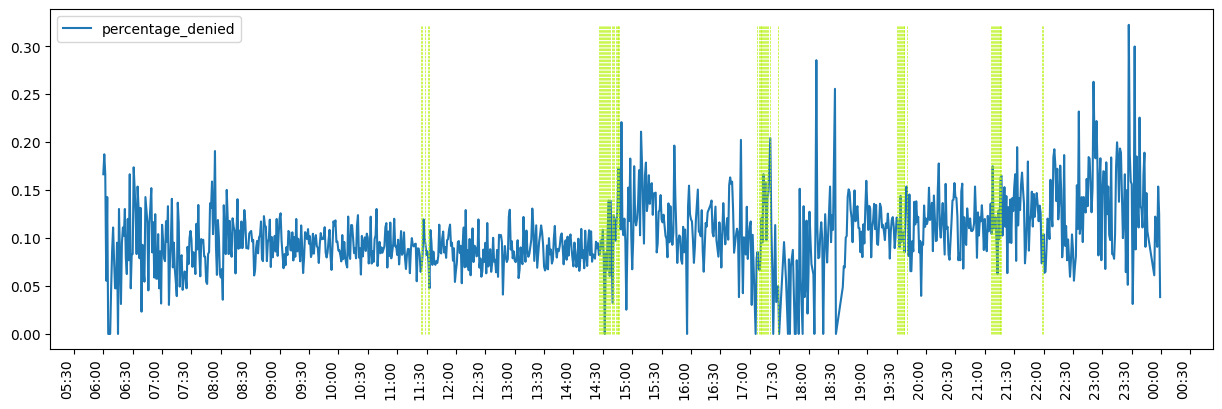

In [74]:
evaluated_variable  = 'percentage_denied' 
'''To apply the model we must create a dataframe with the timestamp as an index and our variable as a single column'''
train_failed = pd.DataFrame(index = list(df_1_pivoted.index.drop('totals')),
                             columns= [evaluated_variable],
                            data=list(df_1_pivoted[evaluated_variable].values[0:-1]) )
train_failed = validate_series(train_failed.loc[train_failed.index >= '1900-01-01 06:00:00'])
'''Creating model
 Changing the agregate to InterQuartile Range helps to mitigate the effect of outlier, where they have less impact than in the default STD'''
model_percentage_denied = VolatilityShiftAD(c=2.0, side='positive', window=30, agg= 'iqr') 

'''Training model'''
anomalies = model_percentage_denied.fit_detect(train_failed)
'''Plotting'''
anomalies_plot_x = anomalies.loc[anomalies[evaluated_variable] == True].index
figure = train_failed.plot(figsize=(15,5))
figure.vlines(x=anomalies_plot_x, ymax=train_failed[evaluated_variable].max(),ymin=0, linestyles= 'dashed', colors  = '#b5f209' ,linewidth=0.5)
#Setting hourly
figure.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
figure.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.setp(figure.xaxis.get_majorticklabels(), rotation = 90)

### Training percentage_reversed model

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

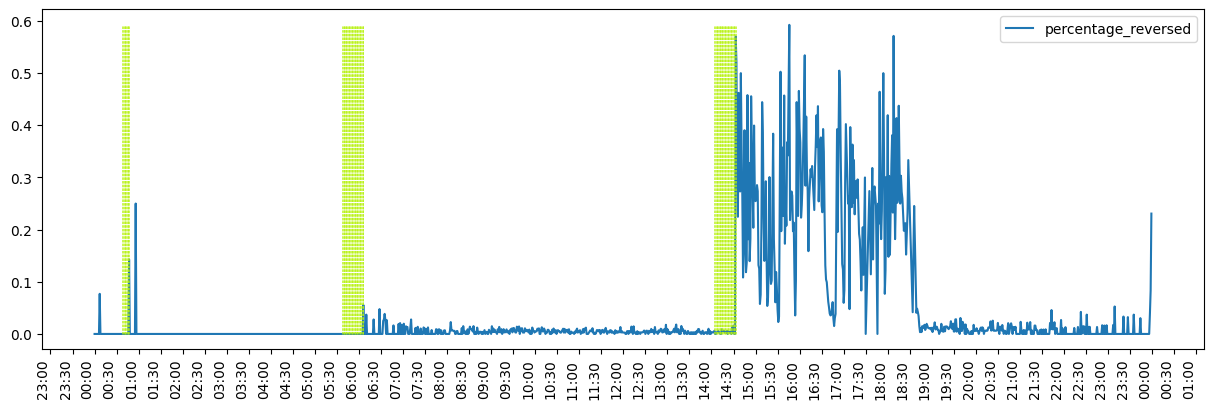

In [76]:
evaluated_variable  = 'percentage_reversed' 
'''To apply the model we must create a dataframe with the timestamp as an index and our variable as a single column'''
train_failed = pd.DataFrame(index = list(df_1_pivoted.index.drop('totals')),
                             columns= [evaluated_variable],
                            data=list(df_1_pivoted[evaluated_variable].values[0:-1]) )
train_failed = validate_series(train_failed)
'''Creating model
Since the training data has very low volatility i can keep the c value high, 
decreasing the sensibility of the model ignoring smaller variances and thus reducing the chance for false-positives'''
model_percentage_reversed = VolatilityShiftAD(c=15.0, side='positive', window=30) 

'''Training model'''
anomalies = model_percentage_reversed.fit_detect(train_failed)

'''Plotting'''
anomalies_plot_x = anomalies.loc[anomalies[evaluated_variable] == True].index
#Setting hourly
figure.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
figure.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.setp(figure.xaxis.get_majorticklabels(), rotation = 90)
figure = train_failed.plot(figsize=(15,5))
figure.vlines(x=anomalies_plot_x, ymax=train_failed[evaluated_variable].max(),ymin=0, linestyles= 'dashed', colors  = '#b5f209' ,linewidth=0.5)

### Training sucess_rate

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

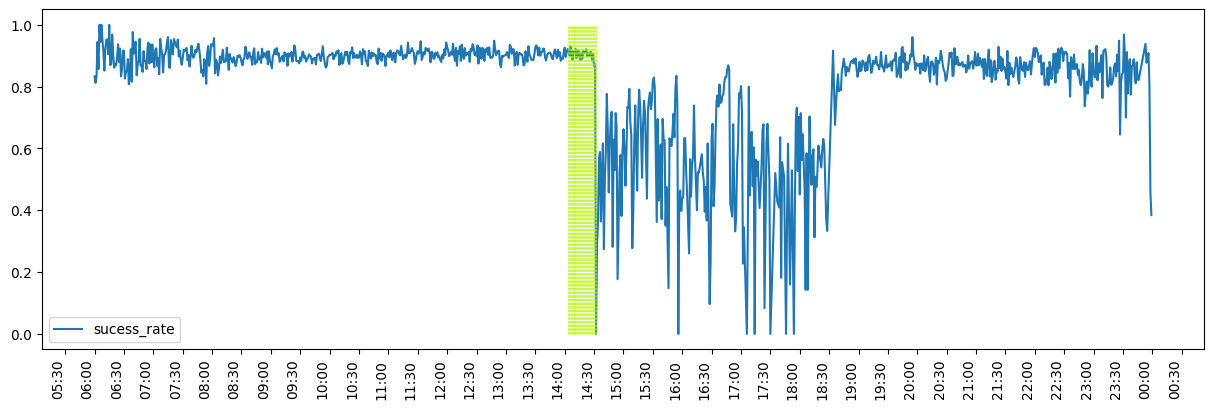

In [74]:
evaluated_variable  = 'sucess_rate' 
'''To apply the model we must create a dataframe with the timestamp as an index and our variable as a single column'''
train_failed = pd.DataFrame(index = list(df_1_pivoted.index.drop('totals')),
                             columns= [evaluated_variable],
                            data=list(df_1_pivoted[evaluated_variable].values[0:-1]) )
'''Creating model'''
model_sucess_rate = VolatilityShiftAD(c=6, side='positive', window=30)

'''Training model'''
train_failed = validate_series(train_failed.loc[train_failed.index >= '1900-01-01 06:00:00'])

'''Plotting'''
anomalies = model_sucess_rate.fit_detect(train_failed)
anomalies_plot_x = anomalies.loc[anomalies[evaluated_variable] == True].index
figure = train_failed.plot(figsize=(15,5))
figure.vlines(x=anomalies_plot_x, ymax=train_failed[evaluated_variable].max(),ymin=0, linestyles= 'dashed', colors  = '#b5f209' ,linewidth=0.5)
#Setting hourly
figure.xaxis.set_major_locator(md.MinuteLocator(byminute = [0, 30]))
figure.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.setp(figure.xaxis.get_majorticklabels(), rotation = 90)


## Building rule-based alert system

In [89]:

# Defining the parameters
df_summary = df_1_pivoted.describe()[['percentage_failed', 'percentage_denied', 'percentage_reversed','sucess_rate']] 

Q3_filter = df_summary.index == '75%'
Q1_filter = df_summary.index == '25%'
C_value= 1.5
#LOWER BOUND =  Q1−c*IQR
#UPER BOUND =  Q3+c*IQR

percentage_failed_uper_bound = df_summary.loc[Q3_filter]['percentage_failed'].values[0] + (df_summary.loc[Q3_filter]['percentage_failed'].values[0] - df_summary.loc[Q1_filter]['percentage_failed'].values[0])*C_value 
percentage_denied_uper_bound = df_summary.loc[Q3_filter]['percentage_denied'].values[0] + (df_summary.loc[Q3_filter]['percentage_denied'].values[0] - df_summary.loc[Q1_filter]['percentage_denied'].values[0])*C_value 
percentage_reversed_uper_bound = df_summary.loc[Q3_filter]['percentage_reversed'].values[0]+(df_summary.loc[Q3_filter]['percentage_reversed'].values[0] - df_summary.loc[Q1_filter]['percentage_reversed'].values[0])*C_value 
percentage_sucess_lower_bound = df_summary.loc[Q1_filter]['sucess_rate'].values[0]-(df_summary.loc[Q3_filter]['percentage_reversed'].values[0] - df_summary.loc[Q1_filter]['percentage_reversed'].values[0])*C_value 

In [91]:

# Creating models 
rule_based_percentage_failed = ThresholdAD(high= percentage_failed_uper_bound)
rule_based_percentage_denied = ThresholdAD(high= percentage_denied_uper_bound)
rule_based_percentage_reversed = ThresholdAD(high= percentage_reversed_uper_bound)
rule_based_percentage_sucess = ThresholdAD(low= percentage_sucess_lower_bound)

## These models don't require training, its a simple threshold detector.

## Saving the models in pickle files

In [15]:
model_dictionary= [ {'variable': 'percentage_failed' , 'predict': model_percentage_failed  , 'rule-based': rule_based_percentage_failed},
     {'variable': 'percentage_denied' , 'predict': model_percentage_denied  , 'rule-based': rule_based_percentage_denied},
     {'variable': 'percentage_reversed' , 'predict': model_percentage_reversed , 'rule-based': rule_based_percentage_reversed},
     {'variable': 'sucess_rate' , 'predict': model_sucess_rate , 'rule-based': rule_based_percentage_sucess}]

In [16]:
for model in model_dictionary:
    with open(f"models/{model.get('variable')}-rule_based.pickle", 'wb') as f:
        pickle.dump(model['rule-based'], f)

    with open(f"models/{model.get('variable')}-predictor.pickle", 'wb') as f:
        pickle.dump(model['predict'], f)
